# Energetski bilans BiH - 2019.

Energetski bilans BiH je u TJ preuzet sa stranice Međunarodne agencije za energiju https://www.iea.org/data-and-statistics/data-tables?country=BOSNIAHERZ&energy=Balances&year=2019. Naknadno će se prevesti na bosanski.

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
file=pd.read_excel("bilans2019.xlsx",sheet_name="TJ_2019", header=0,usecols="A:L")

In [152]:
file=file.set_index("TJ")

In [153]:
file

,Coal,Crude oil,Oil products,Natural gas,Nuclear,Hidro,"Wind, solar,etc",Biofuels and waste,Electricity,Heat,Total
TJ,,,,,,,,,,,
Production,142461.0,NaN,NaN,NaN,0.0,21964.0,1022.0,60845.0,NaN,NaN,226292.0
Imports,47059.0,NaN,66130.0,7871.0,NaN,NaN,NaN,94.0,10170.0,NaN,131324.0
Exports,-14714.0,NaN,1717.0,NaN,NaN,NaN,NaN,-8736.0,-23634.0,NaN,-45367.0
International marine bunkers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
International aviation bunkers,NaN,NaN,-388.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-388.0
Stock changes,-11183.0,3259.0,1472.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6452.0
TES,163623.0,3259.0,68931.0,7871.0,0.0,21964.0,1022.0,52203.0,-13464.0,0.0,305409.0
Transfers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Statistical differences,-4.0,280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276.0


In [154]:
file.loc["TES","Total"]

305409.0

Bosna i Hercegovina je u 2019. koristila ukupno 305409 TJ energije.

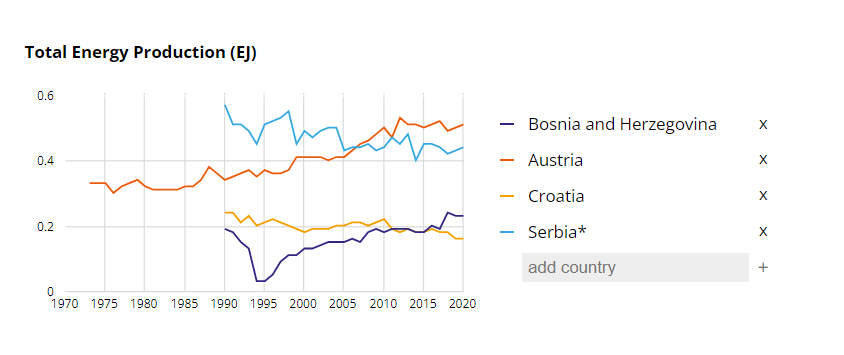

Što se tiče diverziteta izvora energije u TESu, najvažniji primarni izvori energije su ugalj sa 53%, naftni derivati sa 22,6%, te hidropotencijal sa 7,2%. Udio OIE je 24,6%.

Kada je riječ o uvozu energetskih proizvoda, to su najvećim dijelom naftni derivati, ugalj, prirodni gas. Od sekundarnih izvora, može se primijetiti da BiH izvozi skoro dvostruko više električne energije nego što je uvozi. Male količine naftnih derivata se koriste u međunarodnom avionskom saobraćaju, dok energetske rezerve čine ugalj, sirova nafta, naftni derivati, dok ne postoje rezerve prirodnog gasa.
Statistička razlika je prisutna u kategorijama uglja, a nešto veća je u koloni koja se odnosi na sirovu naftu, konverzije jedinica u prvom slučaju, dok veća statistička razlika u drugom slučaju može ukazivati na nepouzdanost prikupljanja podataka.


In [155]:
share_tes=(file.iloc[6,:8]/file.loc["TES","Total"])*100

In [156]:
share_tes

Coal                  53.575042
Crude oil              1.067094
Oil products          22.570062
Natural gas            2.577200
Nuclear                0.000000
Hidro                  7.191668
Wind, solar,etc        0.334633
Biofuels and waste    17.092817
Name: TES, dtype: float64

In [157]:
oie_share=share_tes[5:8].sum()
print("Udio OIE u TES:",oie_share,"%")

Udio OIE u TES: 24.619117314813906 %


Biomasa čini 116% ukupne primarne energije biomase, što znači da od ukupno proizvedene jedan dio ide na izvoz,dok je uvoz veoma mali. Proizvedena količina uglja pokriva 87% ukupne količine, s tim što se ugalj i uvozi i izvozi, dok se država u slučaju nafte i prirodnog gasa u potpunosti oslanja na uvoz.  

In [158]:
production_tes_ratio=(file.iloc[0,:8]/file.iloc[6,:8])*100

Text(0.5, 0, 'Resurs')

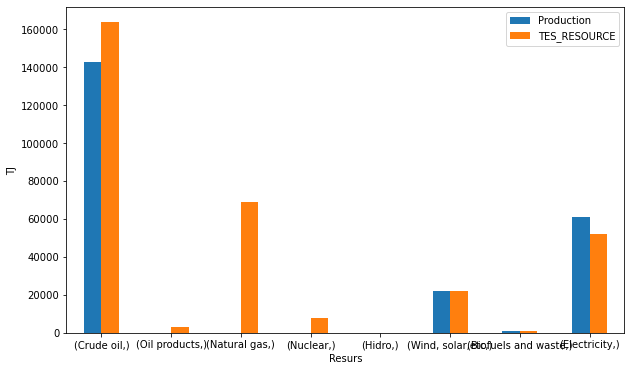

In [159]:
production = file.iloc[0,:8].values
TES_RESOURCE = file.iloc[6,:8].values
index = [file.columns[1:9]]
df = pd.DataFrame({'Production': production,
                   'TES_RESOURCE': TES_RESOURCE}, index=index)
ax = df.plot.bar(rot=0, figsize=(10,6))
ax.set_ylabel("TJ")
ax.set_xlabel("Resurs")

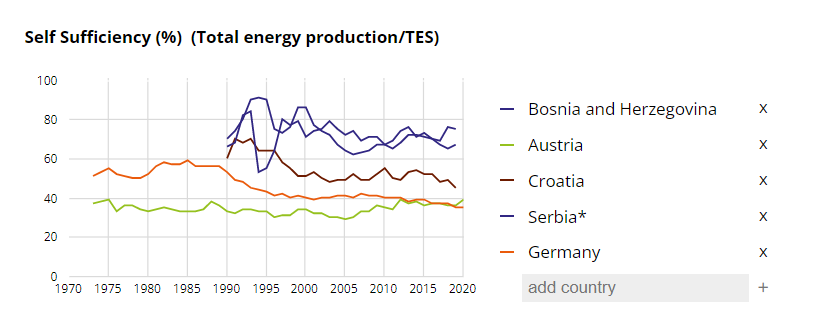

Finalna potrošnja energije se  ogleda kroz četiri glavna sektora: industrija, saobraćaj, stambeni sektor i sektor uslužnih i javnih djelatnosti. Potrošnja resursa u neeenergetske svrhe čini 2,1% ukupne potrošnje. 

U svim sektorima izuzev saobraćaja, značajna je potrošnja električne energije.Sektor industrije se značajnim dijelom oslanja na ugalj, naftne derivate i prirodni gas, dok je u stambenom sektoru prisutan značajn udio biogoriva (39%) za proizvodnju toplote, s obzirom na nizak nivo domaćinstava koji se sanbdijevaju toplotom putem sistema daljinskog grijanja. Drugi značajn izvor energije za domaćinstva je električna energija (35%) , koja se osim za uobičajene dnevne potrebe koristi jednim dijelom i za snabdijevanje toplotom.


In [160]:
production_tes_ratio

Coal                   87.066610
Crude oil                    NaN
Oil products                 NaN
Natural gas                  NaN
Nuclear                      NaN
Hidro                 100.000000
Wind, solar,etc       100.000000
Biofuels and waste    116.554604
dtype: float64

In [161]:
# procenat uglja koji se uvozi u odnosu na proizvedenu
(file.iloc[1,0]/file.iloc[0,0])*100

33.03290023234429

Što se tiče potrošnje energije, najveći potrošač finalne energije je stambeni sektor, pri čemu najveći udio u potrošnji imaju biogoriva,električna i toplotna energija. Nakon toga, najveću potrošnju bilježi sektor transporta koji se uglavnom oslanja na naftne derivate. Sektor industrije troši više resursa, ugalj, naftne derivate, prirodni gas i električnu energiju. Sektor uslužnih djelatnosti najviše troši električnu energiju.

<AxesSubplot:>

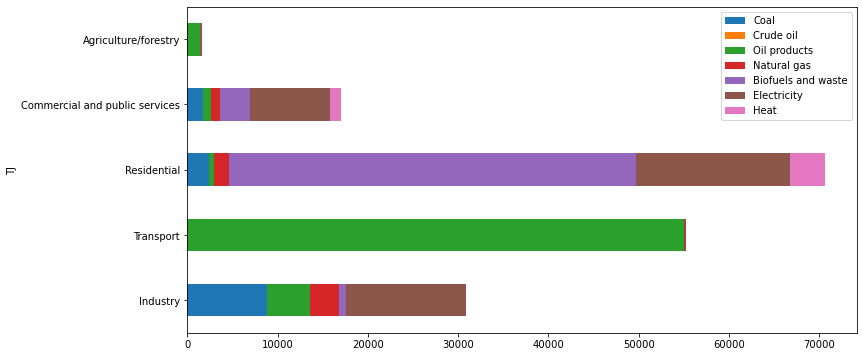

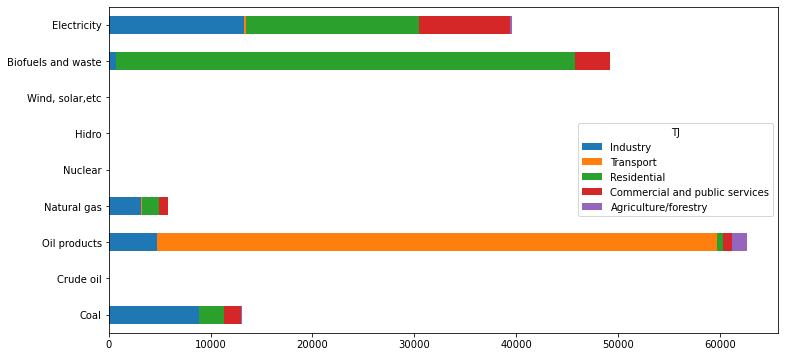

In [164]:
file[["Coal","Crude oil","Oil products","Natural gas","Biofuels and waste","Electricity","Heat"]][20:25].plot(kind="barh",stacked=True,figsize=(12,6))
file_tr[['Industry', 'Transport', 'Residential',
       'Commercial and public services', 'Agriculture/forestry']][:9].plot(kind="barh",stacked=True,figsize=(12,6))


Što se tiče analize po resursima, najviše se troše naftni derivati, preko 60 000 TJ, te biogoriva i električna energija. U potrošnji električne energije najveći udio ima stambeni sektor, te sektor industrije. Procentualni udjeli će biti dodati naknadno.

Prema zadnjem popisu stanovništva, BiH ima 3 531 159 stanovnika. Na osnovu ovoga se može izračunati indikator TPES/CAPITA. Ovaj indikator je uvjetovan smanjenjem populacije sa jedne strane, te velikim udjelom fosilnih goriva u ukupno dostupnoj primanojr energiji.

In [143]:
TPES_CAPITA=file.loc["TES","Total"]/3531159
print("TPES/CAPITA:",TPES_CAPITA,"TJ/st.") #86GJ/st.

TPES/CAPITA: 0.08648973325755085 TJ/st.


http://energyatlas.iea.org/#!/tellmap/-297203538/0

In [146]:
TPES_GDP=file.loc["TES","Total"]/(36527050*0.58) #$
print("TPES/GDP:",TPES_GDP,"TJ/$") #14,4GJ/GDP

TPES/GDP: 0.014415816261628309 TJ/$


In [149]:
ELECT_CONSUM_CAPITA=file.loc["Total final consumption","Electricity"]/3531159
print("Electricity per capita:",ELECT_CONSUM_CAPITA,"TJ/st.") #11,2GJ/st

Electricity per capita: 0.011207368458911083 TJ/st.


In [ ]:
#dodat će se komparacija s drugim državama i efikasnosti konverziej